<a href="https://colab.research.google.com/github/AntoniEduardoSO/Automato_fogao/blob/main/Lista_2_de_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lista 2**

Nome do aluno: Antônio Eduardo Souza De Oliveira.

# **Questão 1. (1 ponto)**

Nesta lista utilizaremos um dataset conhecido, o Pima Indians Diabetes Dataset.



In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)




### A) Complete a variável 'K' com valores 'k' condizentes para o KNN.

### B) Adicione, nas listas de treino e teste, as acurácias do modelo knn treinado. Vide documentação para obter a acurácia.

* Obs: utilizar X_train, y_train para acurácia do treino e X_test e y_test para acurácia do teste.


Para mais informações:
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

K =  20
accuracy_training = []
accuracy_testing  = []

for i in range(1, K + 1):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train, y_train)

  accuracy_training.append(knn.score(X_train, y_train))
  accuracy_testing.append(knn.score(X_test, y_test))



print(f"treino: {accuracy_training}")
print(f"teste: {accuracy_testing}")

maior_score_treinamento = max(accuracy_training)
maior_score_teste = max(accuracy_testing)

k_maior_score_treinamento_knn = accuracy_training.index(maior_score_treinamento) + 1
k_maior_score_teste_knn = accuracy_testing.index(maior_score_teste) + 1


print(f"Com K valendo {k_maior_score_treinamento_knn}, temos o maior score: {maior_score_treinamento:.2f} no caso de treinamento.")
print(f"Com K valendo {k_maior_score_teste_knn}, temos o maior score: {maior_score_teste:.2f} no caso de teste.")

treino: [1.0, 0.8543478260869565, 0.8456521739130435, 0.808695652173913, 0.7891304347826087, 0.7847826086956522, 0.7869565217391304, 0.7782608695652173, 0.7869565217391304, 0.7673913043478261, 0.7804347826086957, 0.7673913043478261, 0.7760869565217391, 0.7760869565217391, 0.7673913043478261, 0.7608695652173914, 0.7673913043478261, 0.7739130434782608, 0.7760869565217391, 0.7717391304347826]
teste: [0.6785714285714286, 0.6948051948051948, 0.685064935064935, 0.7077922077922078, 0.7012987012987013, 0.724025974025974, 0.7305194805194806, 0.7012987012987013, 0.7142857142857143, 0.7207792207792207, 0.7142857142857143, 0.7077922077922078, 0.7077922077922078, 0.7305194805194806, 0.7305194805194806, 0.7337662337662337, 0.7207792207792207, 0.7337662337662337, 0.724025974025974, 0.7337662337662337]
Com K valendo 1, temos o maior score: 1.00 no caso de treinamento.
Com K valendo 16, temos o maior score: 0.73 no caso de teste.


### C) Gere um plot com a acurácia dos dados de treinamento e outro com os dados de teste. Os eixos devem ser compostos da maneira a seguir:
* Eixo x: valores de k
* Eixo y: valores da acurácia

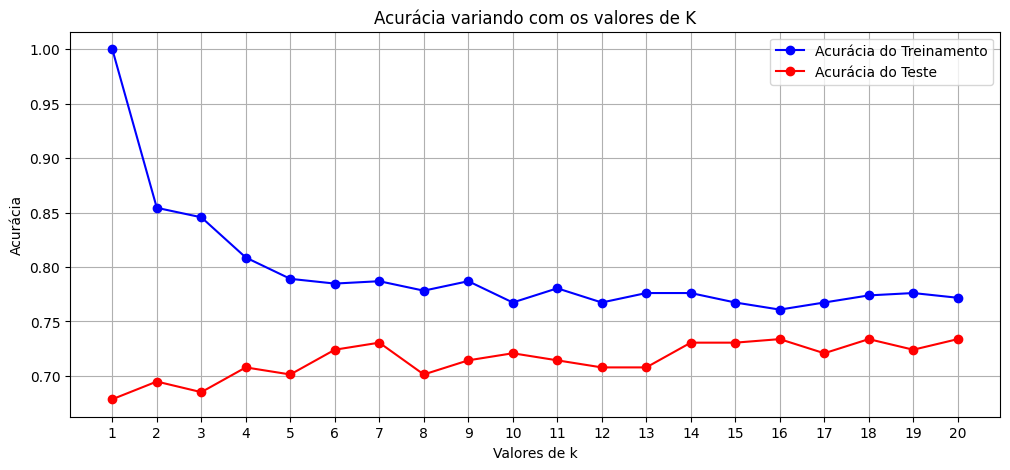

In [7]:
import matplotlib.pyplot as plt

# plt.title('Acurácia variando com os valores de K')
# Complete com o que foi solicitado acima

valores_k = range(1, K+1)

plt.figure(figsize=(12, 5))

# Plotando a acurácia de treinamento
plt.plot(valores_k, accuracy_training, marker='o', linestyle='-', color='b', label='Acurácia do Treinamento')

# Plotando a acurácia de teste
plt.plot(valores_k, accuracy_testing, marker='o', linestyle='-', color='r', label='Acurácia do Teste')

plt.title('Acurácia variando com os valores de K')
plt.xlabel('Valores de k')
plt.ylabel('Acurácia')
plt.xticks(valores_k)
plt.grid(True)
plt.legend()
plt.show()

# **Questão 2. (0,5 ponto)**


A) Avaliando a questão anterior, como pode ser definido um bom valor de k para o modelo?

No caso de teste, temos um valor de K o número 16. Pois é o que tem maior acuracia, no caso de treinamento, pode parecer o numero 1, mas ele está com claro problema de overfitting, pois a medida que aumentamos ele começa a diminuir, devemos focar no caso de teste com K igual a 16.

B) Discorra sobre o valor de *k = 1* em modelos de *KNN*.

No caso de k igual a 1, temos problemas envolvendo ruido, pois ela acaba se tornando mais sensivel a eles. pois a medida que tivermos mais outliers(ruidos) teremos um knn propenso a ser influenciado por esses outliers.
    Assim como dito na primeira questao, podemos ter overfitting, a qual tendo um vizinho igual a 1, temos um sistema generalista, e dependendo do conjunto de dados de entrada posterior, ele pode nao se dar bem com esses novos dados.

C) Descreva uma justificativa para o uso de *KNN* como modelo preditivo nesse dataset.

Assim como dito na matéria de machine learning, um dos motivos de ser utilizado o knn para esse dataset é sua complexidade baixa comparada a outros algoritmos, assim como a sua flexibilidade é alta assim como podemos ver que o dataset se trata de diabetes, a qual o knn consegue utlizar prediçoes com os dados complexos ou ausencia deles quando é colocado a prova.


# **Questão 3. (1 ponto)**
### Com o mesmo código da questão anterior, adapte-o para utilizar o modelo preditivo do Naive Bayes. Em seguida, compare os resultados, avaliando os *scores* de cada tipo de modelo Naive Bayes.

### Para mais informações:
* [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.score)
* [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
* [sklearn.naive_bayes.BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

* OBS: Lembrar de mudar os parâmetros das funções para um possível melhor resultado.

In [8]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [1]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

nb_model_GNB = GaussianNB()
nb_model_GNB.fit(X_train, y_train)

y_train_pred = nb_model_GNB.predict(X_train)
y_test_pred = nb_model_GNB.predict(X_test)

accuracy_train_GNB = accuracy_score(y_train, y_train_pred)
accuracy_test_GNB = accuracy_score(y_test, y_test_pred)


nb_model_MNB = MultinomialNB()
nb_model_MNB.fit(X_train,y_train)

y_train_pred = nb_model_MNB.predict(X_train)
y_test_pred = nb_model_MNB.predict(X_test)

accuracy_train_MNB = accuracy_score(y_train, y_train_pred)
accuracy_test_MNB = accuracy_score(y_test, y_test_pred)


nb_model_BNB = BernoulliNB()
nb_model_BNB.fit(X_train,y_train)

y_train_pred = nb_model_BNB.predict(X_train)
y_test_pred = nb_model_BNB.predict(X_test)

accuracy_train_BNB = accuracy_score(y_train, y_train_pred)
accuracy_test_BNB = accuracy_score(y_test, y_test_pred)


accuracies_train = [ (maior_score_treinamento * 100),(accuracy_train_GNB * 100), (accuracy_train_MNB * 100), (accuracy_train_BNB * 100)]
accuracies_test = [ (maior_score_teste * 100), (accuracy_test_GNB * 100), (accuracy_test_MNB * 100), (accuracy_test_BNB * 100)]


models = ['KNN','GaussianNB', 'MultinomialNB', 'BernoulliNB']


x = range(len(models))

width = 0.35

plt.figure(figsize=(10, 6))
bars_train = plt.bar(x, accuracies_train, width, label='Treinamento', color='b')
bars_test = plt.bar([i + width for i in x], accuracies_test, width, label='Teste', color='r')


for bars in [bars_train, bars_test]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')


plt.xlabel('Modelos de Naive Bayes')
plt.ylabel('Acurácia em porcentagem.')
plt.title('Acurácia de Treinamento e Teste para Modelos de Naive Bayes e KNN')
plt.xticks([i + width / 2 for i in x], models)
plt.legend()


plt.ylim(50, 100)


plt.show()


NameError: name 'X_train' is not defined

# **Questão 4. (1 ponto)**


## A) Descreva se teve alguma mudança significativa na comparação dos modelos preditivos, tanto entre tipos de Naive Bayes, quanto entre Naive Bayes e KNN.









## B) Cite algum caso específico em que Naive Bayes pode ser mais vantajoso do que KNN e vice-versa.

# **Questão 5. (1 ponto)**

## Avalie a base de dados de Pima Indians Diabetes pela acurácia, utilizando Regressão Linear e Regressão Logística.

* Obs: Lembrar de mudar os parâmetros para ser compatível com as regressões respectivas.


## A) Explique como o *fitting* da Regressão Logística se diferencia da Regressão Linear.

## B) Em quais contextos a Regressão Logística é preferível de se utilizar do que a Linear?


In [13]:
df = pd.read_csv("diabetes.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [14]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Complete conforme pedido acima

# **Questão 6. (0,5 ponto)**
## Analise a árvore abaixo e utilize-a para explicar as propriedades do problema.

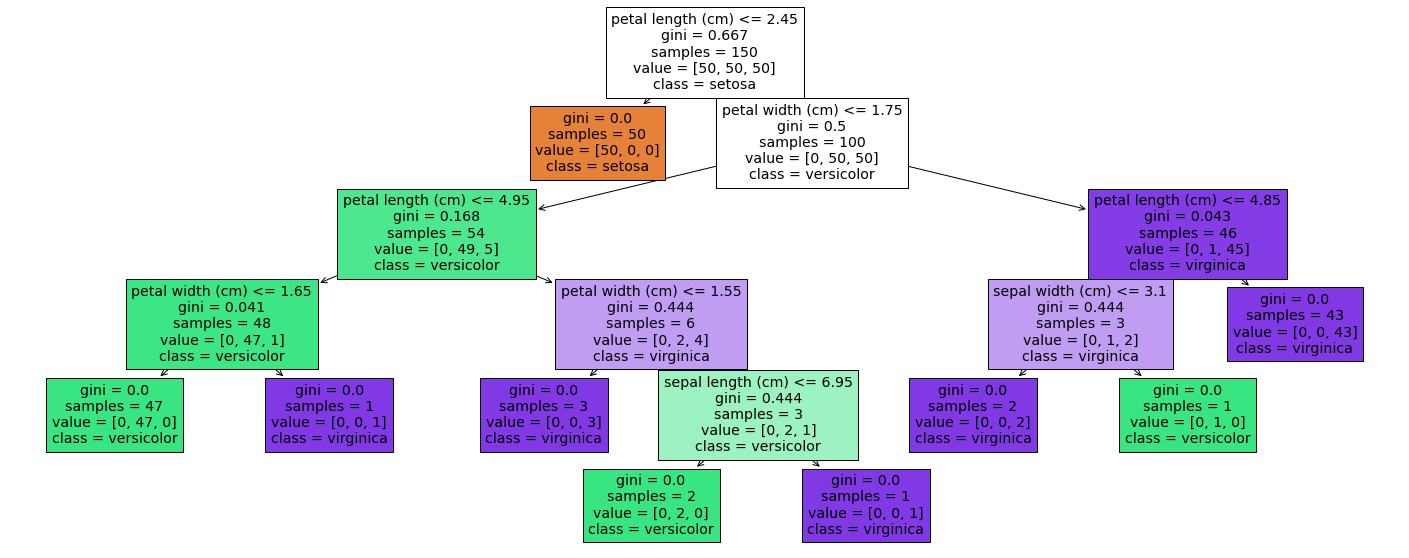

In [ ]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

# **Questão 7. (0,5 ponto)**
## Analise o gráfico da importância que a árvore dá para cada feature e retire insights sobre fatores de riscos da diabetes.


# **Questão 8. (2 pontos)**


---



Colete 2 bases de dados diferentes na internet e utilize a biblioteca *pymfe* para extrair as metafeatures de cada uma, depois calcule a distância euclidiana de cada base e mostre quais são as mais próximas.



Dica: utilize sites como o openML e o kaggle para obter as bases de dados e olhe a documentação da biblioteca em https://pypi.org/project/pymfe/


# **Questão 9. (0,5 ponto)**

Qual a importância de usar as metafeatures para obter informações das bases de dados durante o processo de recomendação de algoritmos?

# **Segunda parte do Projeto (2 pontos)**
Com base nos conhecimentos adquiridos nas aulas e da Lista 1, 2, de continuidade a parte do projeto. Para avaliação desta questão, faça os seguintes passos:


* Escolha algum algoritmo de classificação;
* Use técnicas de valiação de modelo e preveja alguns resultados a partir do modelo;
* Use alguma técnica Séries Temporais;
* Use alguma técnica Visulização de dados;
* Tire alguns ideias (insights) e mostre conclusões.